In [18]:
import sys
sys.path.append("../")

from utility.reaction_rate_calc import *
from utility.plotting import *

PATH = "../data/"
SAVE_PATH = "../plots/"

energy_kelvin = 3700

Reaction rate for j = 0, Ω = 0

In [19]:
j_init = 0
omega_init = 0

losses = Losses(PATH, f"losses_{energy_kelvin}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_0 = losses.get_reaction(Ionization.Penning, energy_kelvin * KELVIN)
di_reaction_0 = losses.get_reaction(Ionization.Dissociative, energy_kelvin * KELVIN)

print(f"Penning reaction rate: {pi_reaction_0.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_0.reaction_rate:.4}")

Penning reaction rate: 2.406e-10
Dissociative reaction rate: 5.903e-10


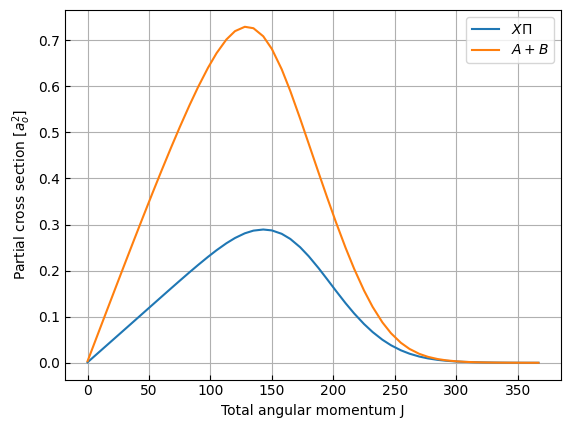

In [20]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_0.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_0.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

Reaction rate for j = 1, Ω = 0

In [21]:
j_init = 1
omega_init = 0

losses = Losses(PATH, f"losses_{energy_kelvin}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_1_0 = losses.get_reaction(Ionization.Penning, energy_kelvin * KELVIN)
di_reaction_1_0 = losses.get_reaction(Ionization.Dissociative, energy_kelvin * KELVIN)

print(f"Penning reaction rate: {pi_reaction_1_0.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_1_0.reaction_rate:.4}")

Penning reaction rate: 7.457e-11
Dissociative reaction rate: 2.242e-10


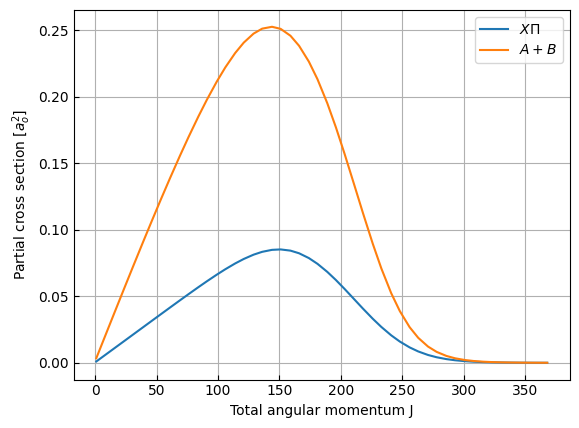

In [22]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_1_0.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_1_0.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

Reaction rate for j = 1, Ω = 1

In [23]:
j_init = 1
omega_init = 1

losses = Losses(PATH, f"losses_{energy_kelvin}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_1_1 = losses.get_reaction(Ionization.Penning, energy_kelvin * KELVIN)
di_reaction_1_1 = losses.get_reaction(Ionization.Dissociative, energy_kelvin * KELVIN)

print(f"Penning reaction rate: {pi_reaction_1_1.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_1_1.reaction_rate:.4}")

Penning reaction rate: 1.658e-10
Dissociative reaction rate: 3.665e-10


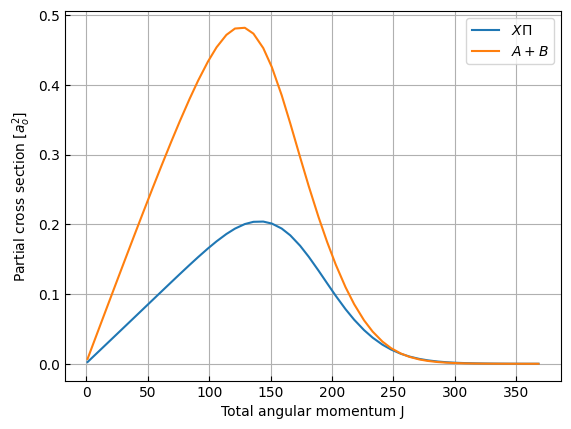

In [24]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_1_1.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_1_1.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

# Full reaction rates

In [25]:
pi_rate_0 = pi_reaction_0.reaction_rate
pi_rate_1 = pi_reaction_1_0.reaction_rate + pi_reaction_1_1.reaction_rate

di_rate_0 = di_reaction_0.reaction_rate
di_rate_1 = di_reaction_1_0.reaction_rate + di_reaction_1_1.reaction_rate

print(f"Total reaction rate for j=0:")
print(f"Penning ionization: {pi_rate_0:.4}")
print(f"Dissociative ionization: {di_rate_0:.4}")
print()
print(f"Total reaction rate for j=1:")
print(f"Penning ionization: {pi_rate_1:.4}")
print(f"Dissociative ionization: {di_rate_1:.4}")
print()
print(f"Ratios j=1 to j=0:")
print(f"Penning ionization: {pi_rate_1/pi_rate_0:.4}")
print(f"Dissociative ionization: {di_rate_1/di_rate_0:.4}")

Total reaction rate for j=0:
Penning ionization: 2.406e-10
Dissociative ionization: 5.903e-10

Total reaction rate for j=1:
Penning ionization: 2.404e-10
Dissociative ionization: 5.907e-10

Ratios j=1 to j=0:
Penning ionization: 0.9991
Dissociative ionization: 1.001


Energy dependence of reaction rates

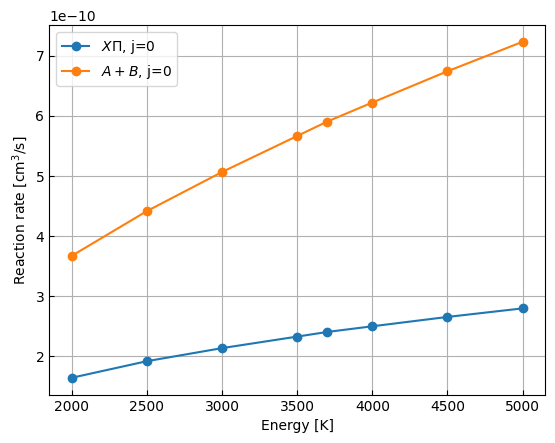

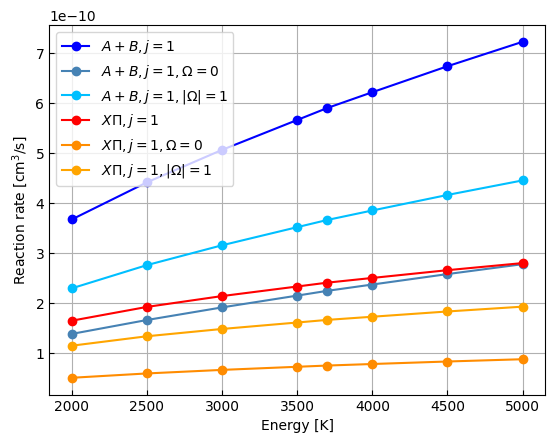

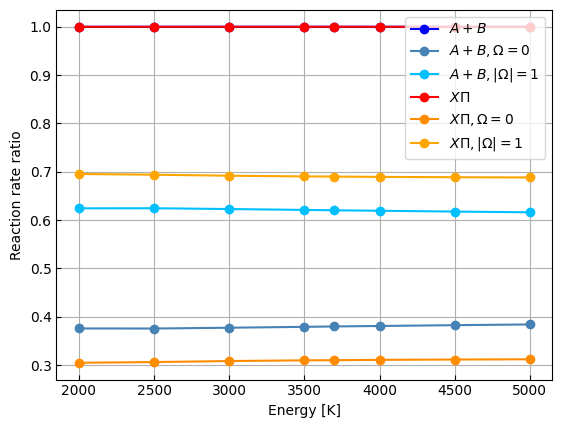

In [20]:
energies = [2000, 2500, 3000, 3500, 3700, 4000, 4500, 5000]

xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11 = get_reaction_rate_dependence("losses", energies, is_energy_parameter=True, identity=3700)

fig, ax = plot_reaction_rate_dependence_0("Energy [K]", energies, xpi0, bsigma0)
fig, ax = plot_reaction_rate_dependence_1("Energy [K]", energies, xpi10, xpi11, bsigma10, bsigma11)
fig, ax = plot_ratio_dependence("Energy [K]", energies, xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11)